# Problem Sheet 1

In [3]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Polya urn models
Discrete time experiment: 
- initally there are k balls (each unique colour).
- At each time step, draw one ball uniformaly at random and then replace two balls of that colour. 

Transition probability: 

$$p(\underline{x} + e_i | \underline{x}) = \frac{f_i x_i^\gamma}{\sum_{j=1}^{k} f_j x_j^\gamma} $$

In [13]:
#uniform probability (f_i = 1 and γ = 1)

k = 5
X0 = np.ones(k)
T = 50
XN = np.ones((T, k))

current_state = []
current_state.extend(range(k))
for j in range(1,T):
    r = np.random.randint(0,len(current_state)-1) # random is inclusive [a,b] but remember python indexes from 0 to k-1
    newBall = current_state[r]
    XN[j:,newBall] = XN[j-1,newBall]+1
    current_state.append(newBall)

In [14]:
XN.sort(axis =1) #try without this

Text(0.5, 1.0, 'Polya urn')

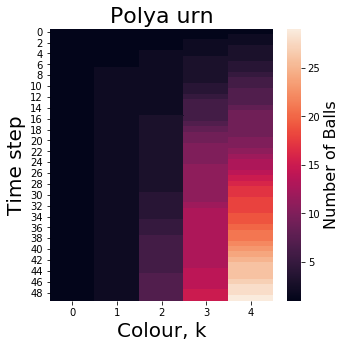

In [15]:
plt.figure(figsize = (5,5))
# pal = sns.color_palette("husl", 5000)

pcm = sns.heatmap(XN,cbar_kws={'label': r'Number of Balls'})
pcm.figure.axes[-1].yaxis.label.set_size(16)
plt.ylabel('Time step', fontsize = 20)
plt.xlabel('Colour, k', fontsize = 20)
plt.title('Polya urn', fontsize = 22)


In [34]:
#fitness probability with reinforcement paramter

k = 500
X0 = np.ones(k)
T = 8000
gamma = 0.5
fitness = np.ones(k)
XN = np.ones((T, k))

current_state = []
current_state.extend(range(k))
for j in range(1,T):
    denominator = sum([fitness[kk]*XN[j,kk]**gamma for kk in range(k)])
    selection_prob = [fitness[kk]*(XN[j,kk])**gamma/denominator for kk in range(k)]
    r = np.random.choice(k, p = selection_prob) #non uniform random choice from range(len(current))
    newBall = current_state[r]
    XN[j:,newBall] = XN[j-1,newBall]+1
    current_state.append(newBall)
XN.sort(axis =1) #try without this

In [1]:
def PolyUrn(K, T, gamma, fitness):
    '''Function that returns the State Space of the k colour polyurn up to time T. 
    Each colour has a fitness (given by array) and all colours have same reinforcement parameter'''
    
    XN = np.ones((T, K))
    for j in range(1,T):
        denominator = sum([fitness[kk]*XN[j,kk]**gamma for kk in range(K)])
        selection_prob = [fitness[kk]*(XN[j,kk])**gamma/denominator for kk in range(K)]
        newBall = np.random.choice(K, p = selection_prob) #non uniform random choice from range(len(current))
        XN[j:,newBall] = XN[j-1,newBall]+1
    XN.sort(axis =1) #try without this
    
    return XN

Text(0.5, 1.0, 'Polya urn')

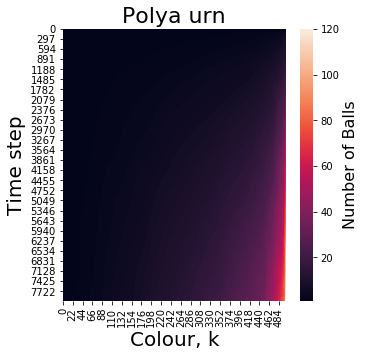

In [30]:
plt.figure(figsize = (5,5))
pcm = sns.heatmap(XN,cbar_kws={'label': r'Number of Balls'})
pcm.figure.axes[-1].yaxis.label.set_size(16)
plt.ylabel('Time step', fontsize = 20)
plt.xlabel('Colour, k', fontsize = 20)
plt.title('Polya urn', fontsize = 22)


# Empirical Tail Distributions

Empirical CDF: https://www.statsmodels.org/devel/generated/statsmodels.distributions.empirical_distribution.ECDF.html

In [24]:
from statsmodels.distributions.empirical_distribution import ECDF

In [44]:
ecdf_XN = ECDF(XN[T-1,:])
# ecdf_XN.y

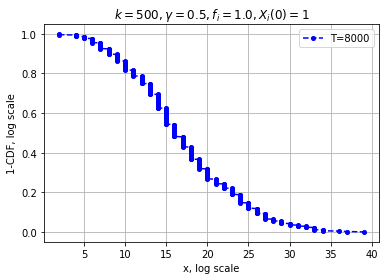

In [38]:
# plt.plot(bins, tail,linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.plot(ecdf_XN.x, np.ones(len(ecdf_XN.y))-ecdf_XN.y, linestyle='--', marker="o",ms = 4, color='b',label = 'T={}'.format(T))

# plt.yscale('log')
# plt.xscale('log')
plt.legend()
plt.ylabel("1-CDF, log scale")
plt.title(r'$k = {}, γ = {}, f_i = {}, X_i(0) = 1$'.format(k, gamma, fitness[0]))
plt.xlabel('x, log scale')
plt.grid(True)

# Notes: Gershgorin disk theorem

Given a matrix $A \in \mathbb{R}^{n \times n}$, the Gershgorin disk theorem stats that all eigenvalues lie in a least one Gershogorin disk,

$D_i$ is a disk centered on $a_{i,i}$ with radius $R_i = \sum_{j \neq i} a_{i,j}$.

In [2]:
def plot_circle(center,radius): # Function to plot a circle
    x=np.linspace(-1,1,500)
    x*=radius
    x+=center
    y=np.sqrt(radius**2-(x-center)**2)
    plt.plot(x,y,'r-',lw=3)
    plt.plot(x,-1*y,'r-',lw=3)

Consider a random walk, with 4 states with periodic BC

In [4]:
p=0.3
q=0.7
A=np.array([[0,p,0,0,q],[q,0,p,0,0],[0,q,0,p,0],[0,0,q,0,p],[p,0,0,q,0]])
print(A)

centers=[]
radii=[]

N=A.shape[0]
for i in range(N):
    centers.append(A[i,i])
    temp=0.0
    for j in range(N):
        if j!=i:
            temp+=A[i,j]
    radii.append(temp)

evals,evecs=np.linalg.eig(A)

[[ 0.   0.3  0.   0.   0.7]
 [ 0.7  0.   0.3  0.   0. ]
 [ 0.   0.7  0.   0.3  0. ]
 [ 0.   0.   0.7  0.   0.3]
 [ 0.3  0.   0.   0.7  0. ]]


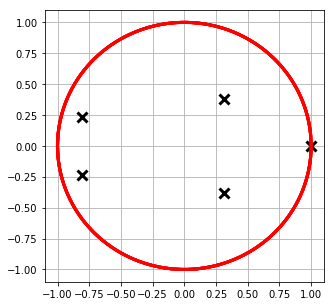

In [5]:
plt.figure(figsize = (5,5))
for i in range(N):
    plot_circle(centers[i],radii[i]) # Plot disk i
    plt.plot(np.real(evals[i]),np.imag(evals[i]),'kx',mew=3,ms=10) # Plot evalue i
lim=1.1
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.grid()



In [6]:
print(evals)
print ('\n eigenvectors', evecs.T)

[-0.80901699+0.2351141j  -0.80901699-0.2351141j   1.00000000+0.j
  0.30901699+0.38042261j  0.30901699-0.38042261j]

 eigenvectors [[-0.1381966-0.4253254j  -0.1381966+0.4253254j   0.3618034-0.26286556j
  -0.4472136+0.j          0.3618034+0.26286556j]
 [-0.1381966+0.4253254j  -0.1381966-0.4253254j   0.3618034+0.26286556j
  -0.4472136-0.j          0.3618034-0.26286556j]
 [-0.4472136+0.j         -0.4472136+0.j         -0.4472136+0.j
  -0.4472136+0.j         -0.4472136+0.j        ]
 [ 0.1381966-0.4253254j  -0.3618034-0.26286556j -0.3618034+0.26286556j
   0.1381966+0.4253254j   0.4472136+0.j        ]
 [ 0.1381966+0.4253254j  -0.3618034+0.26286556j -0.3618034-0.26286556j
   0.1381966-0.4253254j   0.4472136-0.j        ]]


Lazy random walk:

In [7]:
eps=0.1
p=0.3
q=1-p-eps
A=np.array([[eps,p,0,q],[q,eps,p,0],[0,q,eps,p],[p,0,q,eps]])
print(A)

centers=[]
radii=[]

N=A.shape[0]
for i in range(N):
    centers.append(A[i,i])
    temp=0.0
    for j in range(N):
        if j!=i:
            temp+=A[i,j]
    radii.append(temp)

evals,evecs=np.linalg.eig(A)

[[ 0.1  0.3  0.   0.6]
 [ 0.6  0.1  0.3  0. ]
 [ 0.   0.6  0.1  0.3]
 [ 0.3  0.   0.6  0.1]]


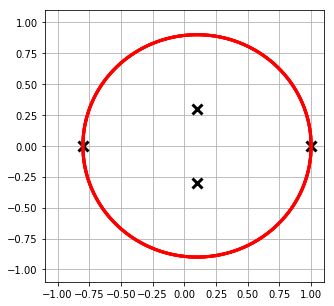

In [8]:
plt.figure(figsize = (5,5))
for i in range(N):
    plot_circle(centers[i],radii[i]) # plot disk i
    plt.plot(np.real(evals[i]),np.imag(evals[i]),'kx',mew=3,ms=10) #plot evalue i
lim=1.1
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.grid()